In [69]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def simulate_orbit(distance_to_sun, orbital_speed):
    """
    Simulates a sun-synchronous orbit.
    :param distance_to_sun: Distance from the sun in meters.
    :param orbital_speed: Speed of the orbit in meters per second.
    :return: Array of angles (in radians) representing the position of the solar cell relative to the sun over one orbit.
    """
    # Assuming a circular orbit for simplicity
    orbit_circumference = 2 * np.pi * distance_to_sun
    orbit_period = orbit_circumference / orbital_speed

    # Generating angles for one complete orbit
    time_steps = np.linspace(0, orbit_period, 1000)
    angles = (2 * np.pi / orbit_period) * time_steps

    return angles

def plot_orbit(angles, distance_to_sun):
    """
    Plots the orbit based on angles and distance.
    :param angles: Array of angles (in radians).
    :param distance_to_sun: Distance from the sun in meters.
    """
    x = distance_to_sun * np.cos(angles)/1.496e+8
    y = distance_to_sun * np.sin(angles)/1.496e+8
    
    min=np.round(np.min(x)/100)*100
    max=np.round(np.max(x)/100)*100
    
    list = np.linspace(min, max, 5)
    plt.figure(figsize=(4,4))
    plt.plot(x, y, label="Orbit Path")
    plt.scatter([0], [0], s=100, color='red', label="Sun")
    plt.xlabel('Distance (AU)')
    plt.ylabel('Distance (AU)')
    plt.xticks(list)
    plt.yticks(list)
    plt.title('Sun-Synchronous Orbit')
    plt.legend(loc=1)
    plt.axis('equal')
    plt.show()

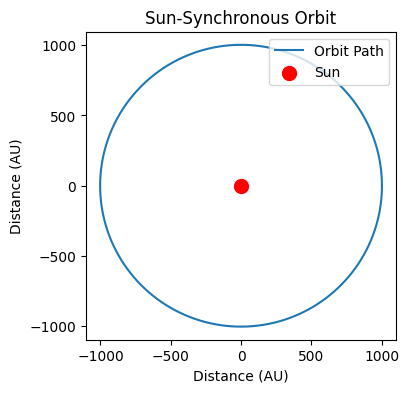

In [70]:
distance_to_sun_ex = 1.5e11  # 150 million km in meters
orbital_speed_ex = 30000     # 30 km/s in meters per second

angles = simulate_orbit(distance_to_sun_ex, orbital_speed_ex)
plot_orbit(angles, distance_to_sun_ex)

In [ ]:
    
def update(frame, angles, distance_to_sun, orbit_line, satellite):
    index = frame % len(angles)  # 순환 인덱스
    angle = angles[index]
    x, y = distance_to_sun * np.cos(angle), distance_to_sun * np.sin(angle)
    satellite.set_data([x], [y])
    orbit_line.set_data(distance_to_sun * np.cos(angles[:index]), distance_to_sun * np.sin(angles[:index]))
    return orbit_line, satellite

c:\Users\김미르\Documents\GitHub\Perovskite Tandem Solar Cell Calculator\.venv\lib\site-packages\matplotlib\animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


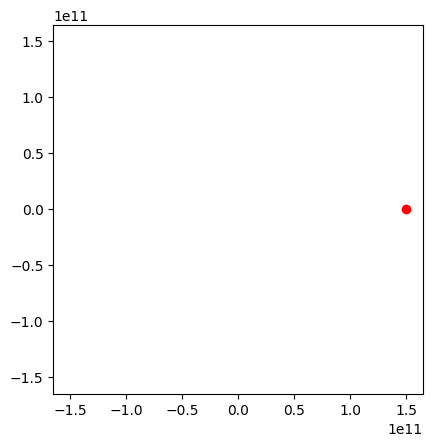

In [16]:
distance_to_sun = 1.5e11  # 태양으로부터의 거리 (예시)
orbital_speed = 30000    # 궤도 속도 (예시)
angles = simulate_orbit(distance_to_sun, orbital_speed)

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-distance_to_sun * 1.1, distance_to_sun * 1.1)
ax.set_ylim(-distance_to_sun * 1.1, distance_to_sun * 1.1)

orbit_line, = ax.plot([], [], 'b', lw=1)
satellite, = ax.plot([], [], 'ro')

total_frames = 10 * 100  # 5초 동안의 총 프레임 수

ani_fast = FuncAnimation(fig, update, frames=total_frames, fargs=(angles, distance_to_sun, orbit_line, satellite), interval=25, blit=True)

plt.show()